In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics

In [2]:
%run play_coin_game.ipynb

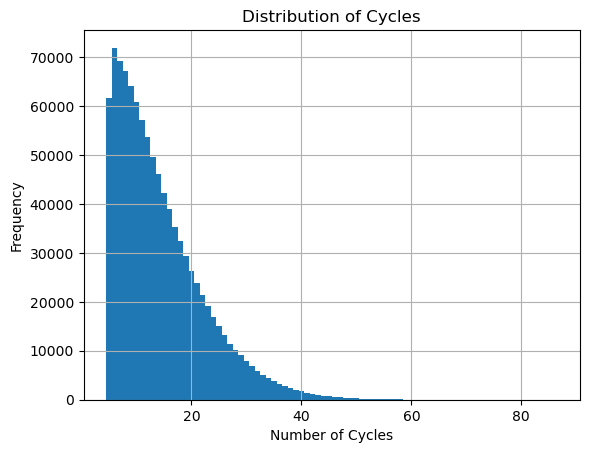

In [3]:
# plot the histogram of cycles distribution
def plot_cycle_distribution(data):
    plt.hist(cycle_counts, bins=range(min(data), max(data)+2), align='left')
    plt.grid()
    plt.xlabel('Number of Cycles')
    plt.ylabel("Frequency")
    plt.title("Distribution of Cycles")
    plt.show
    
plot_cycle_distribution(cycle_counts)

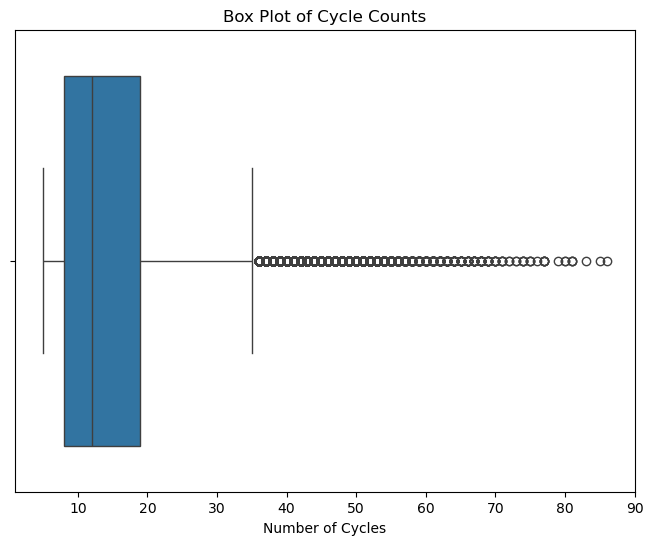

In [4]:
def box_plot(data):
    # Box plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=cycle_counts)
    plt.xlabel('Number of Cycles')
    plt.title('Box Plot of Cycle Counts')
    plt.show()
box_plot(cycle_counts)

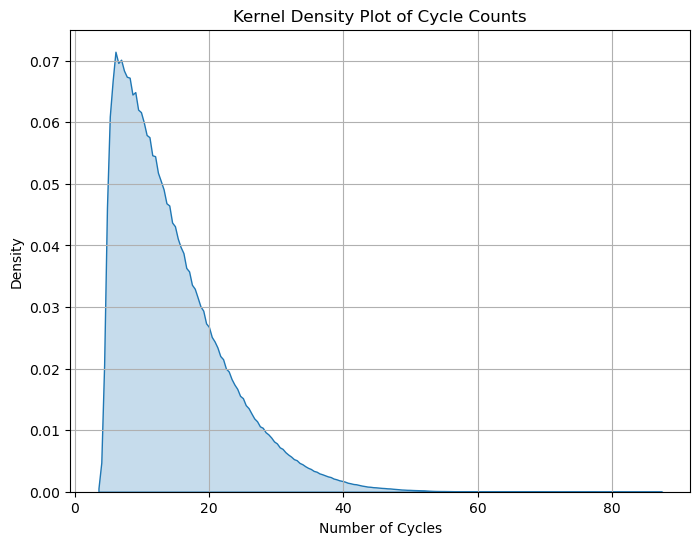

In [5]:

# Kernel density plot
def kernel_density_plot(data):
    plt.figure(figsize=(8, 6))
    sns.kdeplot(cycle_counts, fill=True)
    plt.grid()
    plt.xlabel('Number of Cycles')
    plt.ylabel('Density')
    plt.title('Kernel Density Plot of Cycle Counts')
    plt.show()
    
kernel_density_plot(cycle_counts)

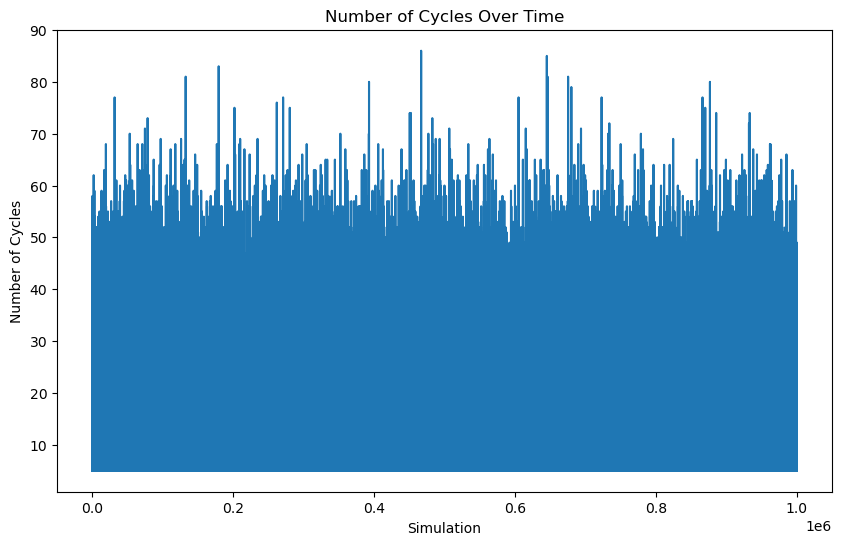

In [6]:
def cycle_counts_overtime(data):
    # Line plot of cycle_counts over time
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(cycle_counts)), cycle_counts)
    plt.xlabel('Simulation')
    plt.ylabel('Number of Cycles')
    plt.title('Number of Cycles Over Time')
    plt.show()

cycle_counts_overtime(cycle_counts)

In [7]:
def calculate_descriptive_statistics(data):
    mean = np.mean(data)
    median = np.median(data)
    mode_value = statistics.mode(data)
    std_dev = np.std(data)
    min_val = np.min(data)
    max_val = np.max(data)
    percentile_25 = np.percentile(data, 25)
    percentile_75 = np.percentile(data, 75)

    return mean, median,mode_value, std_dev, min_val, max_val, percentile_25, percentile_75


# Calculate descriptive statistics
mean, median,mode_value, std_dev, min_val, max_val, percentile_25, percentile_75 = calculate_descriptive_statistics(cycle_counts)
mean = round(mean,2)
std_dev = round(std_dev,2)
# Print the results
print("Mean:", mean)
print("Median:", median)
print("Mode:", mode_value)
print("Standard Deviation:", std_dev)
print("Minimum Value:", min_val)
print("Maximum Value:", max_val)
print("25th Percentile:", percentile_25)
print("75th Percentile:", percentile_75)


Mean: 14.35
Median: 12.0
Mode: 6
Standard Deviation: 7.98
Minimum Value: 5
Maximum Value: 86
25th Percentile: 8.0
75th Percentile: 19.0


In [8]:
def monte_carlo_simulation(num_games):
    # Initiate the sum of number of cycles
    total_cycles =0
    # loop through the number of simulations (games)
    for _ in range(num_games):
        # initial state
        aCoins = 4
        bCoins = 4
        potCoins = 2
        # even when a player loses, that final cycle is counted as last cycle
        cycles = 1
        
        # the game runs when condition is true, else terminates
        while True:
            
            # player A
            # generate random numbers from 1 to 6
            aRoll = random.randint(1, 6)
            # apply game rules
            if aRoll == 1:
                pass
            elif aRoll == 2:
                aCoins += potCoins
                potCoins = 0
            elif aRoll == 3:
                aCoins += potCoins // 2
                potCoins //= 2
            elif aRoll > 3:
                # termination condition
                if aCoins <= 0:
                    break
                aCoins -= 1
                potCoins += 1
                

            # player B
            # generate random numbers from 1 to 6
            bRoll = random.randint(1, 6)
            # apply game rules
            if bRoll == 1:
                pass
            elif bRoll == 2:
                bCoins += potCoins
                potCoins = 0
            elif bRoll == 3:
                bCoins += potCoins // 2
                potCoins //= 2
            elif bRoll > 3:
                # termination condition
                if bCoins <=0:
                    break
                bCoins -= 1
                potCoins += 1
                

            cycles += 1

        total_cycles += cycles

    return total_cycles/num_games

num_games = 5000
expected_cycles = monte_carlo_simulation(num_games)
expected_cycles = round(expected_cycles,2)
print("Expected number of cycles:", expected_cycles)

Expected number of cycles: 14.5


In [9]:
def calculate_expected_value(num_games_values):
    expected_vals = []
    for num_games in num_games_values:
        expected_cycles = monte_carlo_simulation(num_games)
        expected_cycles = round(expected_cycles, 2)
        expected_vals.append(expected_cycles)
    return expected_vals

num_games_values = [10, 100, 1000, 10000, 100000, 1000000]
expected_vals = calculate_expected_value(num_games_values)

# Print the results for each num_games value
for i in range(len(num_games_values)):
    print(f"Expected number of cycles (num_games={num_games_values[i]}): {expected_vals[i]}")


Expected number of cycles (num_games=10): 14.7
Expected number of cycles (num_games=100): 14.39
Expected number of cycles (num_games=1000): 14.54
Expected number of cycles (num_games=10000): 14.3
Expected number of cycles (num_games=100000): 14.37
Expected number of cycles (num_games=1000000): 14.36


In [10]:
def calculate_CI(data, confidence_level=0.95):
    n = len(data)
    mean = np.mean(data)
    std_dev = np.std(data)
    t_value = stats.t.ppf((1 + confidence_level) / 2, df=n-1)
    margin_of_error = t_value * (std_dev / np.sqrt(n))
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error
    return lower_bound, upper_bound


# Calculate 95% confidence interval
lower, upper = calculate_CI(cycle_counts, confidence_level=0.95)
lower = round(lower,2)
upper = round(upper,2)
print("Confidence Interval (95%):", lower, "-", upper)


Confidence Interval (95%): 14.33 - 14.36
